In [1]:

h5ad_file = '/blue/pinaki.sarder/j.fermin/CellAtlas/data/Kidney/H5AD_files/XY02_IU-21-016F.h5ad'
wsi_file = '/blue/pinaki.sarder/j.fermin/Annotations/Data/XY02_IU-21-016F/XY02_IU-21-016F.tif'

In [2]:
import scanpy as sc
adata = sc.read_h5ad(h5ad_file)

print (adata)

AnnData object with n_obs × n_vars = 1394 × 14294
    obs: 'in_tissue', 'array_row', 'array_col', 'sample'
    var: 'gene_symbols', 'feature_types'
    uns: 'spatial'
    obsm: 'spatial'


In [3]:
print("\nExpression Matrix (X):")
print(adata.X.shape) 
print(adata.X[:1])


Expression Matrix (X):
(1394, 14294)
  (np.int32(0), np.int32(5))	1.0
  (np.int32(0), np.int32(10))	1.0
  (np.int32(0), np.int32(13))	1.0
  (np.int32(0), np.int32(21))	1.0
  (np.int32(0), np.int32(29))	1.0
  (np.int32(0), np.int32(40))	1.0
  (np.int32(0), np.int32(49))	1.0
  (np.int32(0), np.int32(50))	1.0
  (np.int32(0), np.int32(52))	1.0
  (np.int32(0), np.int32(64))	1.0
  (np.int32(0), np.int32(69))	1.0
  (np.int32(0), np.int32(75))	1.0
  (np.int32(0), np.int32(81))	6.0
  (np.int32(0), np.int32(84))	2.0
  (np.int32(0), np.int32(85))	9.0
  (np.int32(0), np.int32(99))	1.0
  (np.int32(0), np.int32(100))	1.0
  (np.int32(0), np.int32(105))	2.0
  (np.int32(0), np.int32(114))	1.0
  (np.int32(0), np.int32(118))	1.0
  (np.int32(0), np.int32(122))	1.0
  (np.int32(0), np.int32(145))	1.0
  (np.int32(0), np.int32(151))	1.0
  (np.int32(0), np.int32(159))	1.0
  (np.int32(0), np.int32(160))	1.0
  :	:
  (np.int32(0), np.int32(14097))	1.0
  (np.int32(0), np.int32(14099))	1.0
  (np.int32(0), np.int32

In [4]:
print(adata.var.shape)

(14294, 2)


In [5]:
print(adata.obs.shape)

(1394, 4)


In [6]:
print(adata.obs[['array_row', 'array_col']].head())

                    array_row  array_col
AAACAATCTACTAGCA-1          3         43
AAACATTTCCCGGATT-1         61         97
AAACGCTGGGCACGAC-1         70        126
AAACTGCTGGCTCCAA-1         45         67
AAAGACCCAAGTCGCG-1         10         48


In [7]:
print(adata.obsm['spatial'].shape)

(1394, 2)


In [8]:
import scanpy as sc
import matplotlib.pyplot as plt
import openslide
import numpy as np

In [9]:
from PIL import Image
from PIL import ImageFile
import numpy as np
import matplotlib.pyplot as plt

# Disable decompression bomb error
Image.MAX_IMAGE_PIXELS = None  # 👈 allow very large image
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Load image
img = Image.open(wsi_file)

# Downsample for plotting
scale = 16
thumb = img.resize((img.width // scale, img.height // scale))
thumb_np = np.array(thumb)

# Get spot coordinates
spatial_coords = adata.obsm['spatial']
x = spatial_coords[:, 0]
y = spatial_coords[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.imshow(thumb_np)
plt.scatter(x / scale, y / scale, s=30, c='red', edgecolor='white', linewidth=0.5, alpha=0.7)
plt.title("Spots overlaid on WSI")
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/blue/pinaki.sarder/j.fermin/Annotations/Data/XY02_IU-21-016F/XY02_IU-21-016F.tif'

Building spatial neighborhood graph...
Calculating spatial autocorrelation...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.87/s]


Available columns in adata.var after spatial analysis:
['gene_symbols', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts']
Moran's I related columns: []
Moran's I columns not found. Using manual method...
Running manual Moran's I calculation...
Building 6-nearest neighbors graph...
Calculating Moran's I for all genes...
Processing gene 0/18048
Processing gene 2000/18048
Processing gene 4000/18048
Processing gene 6000/18048
Processing gene 8000/18048
Processing gene 10000/18048
Processing gene 12000/18048
Processing gene 14000/18048
Processing gene 16000/18048
Processing gene 18000/18048

Top 100 spatially variable genes (Manual Moran's I):
         manual_morans_i
IGKC            0.746816
PAH             0.742665
DES             0.742632
IGHM            0.738102
SLC22A8         0.737692
ALB             0.731342
ALDOB           0.724661
RBP4            0.723285
UMOD            0.708864
MYH11           0.703797
SLC12A3         0.698205
JCHAIN   

/blue/pinaki.sarder/h.lohaan/.conda/envs/dnr01/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/blue/pinaki.sarder/h.lohaan/.conda/envs/dnr01/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/blue/pinaki.sarder/h.lohaan/.conda/envs/dnr01/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Processing gene 2000/18048
Processing gene 4000/18048
Processing gene 6000/18048
Processing gene 8000/18048
Processing gene 10000/18048
Processing gene 12000/18048
Processing gene 14000/18048
Processing gene 16000/18048
Processing gene 18000/18048

Top 100 spatially variable genes (Spatial Correlation):
          spatial_correlation
SMIM9                       0
F8                          0
F8A1                        0
FUNDC2                      0
CMC4                        0
MTCP1                       0
BRCC3                       0
VBP1                        0
SLC10A3                     0
FAM3A                       0
G6PD                        0
IKBKG                       0
CTAG2                       0
GAB3                        0
DKC1                        0
MPP1                        0
DNASE1L1                    0
TAZ                         0
ATP6AP1                     0
GDI1                        0

SUMMARY OF METHODS:

Manual Moran's I:
Top 10 genes: ['IGKC', 'P

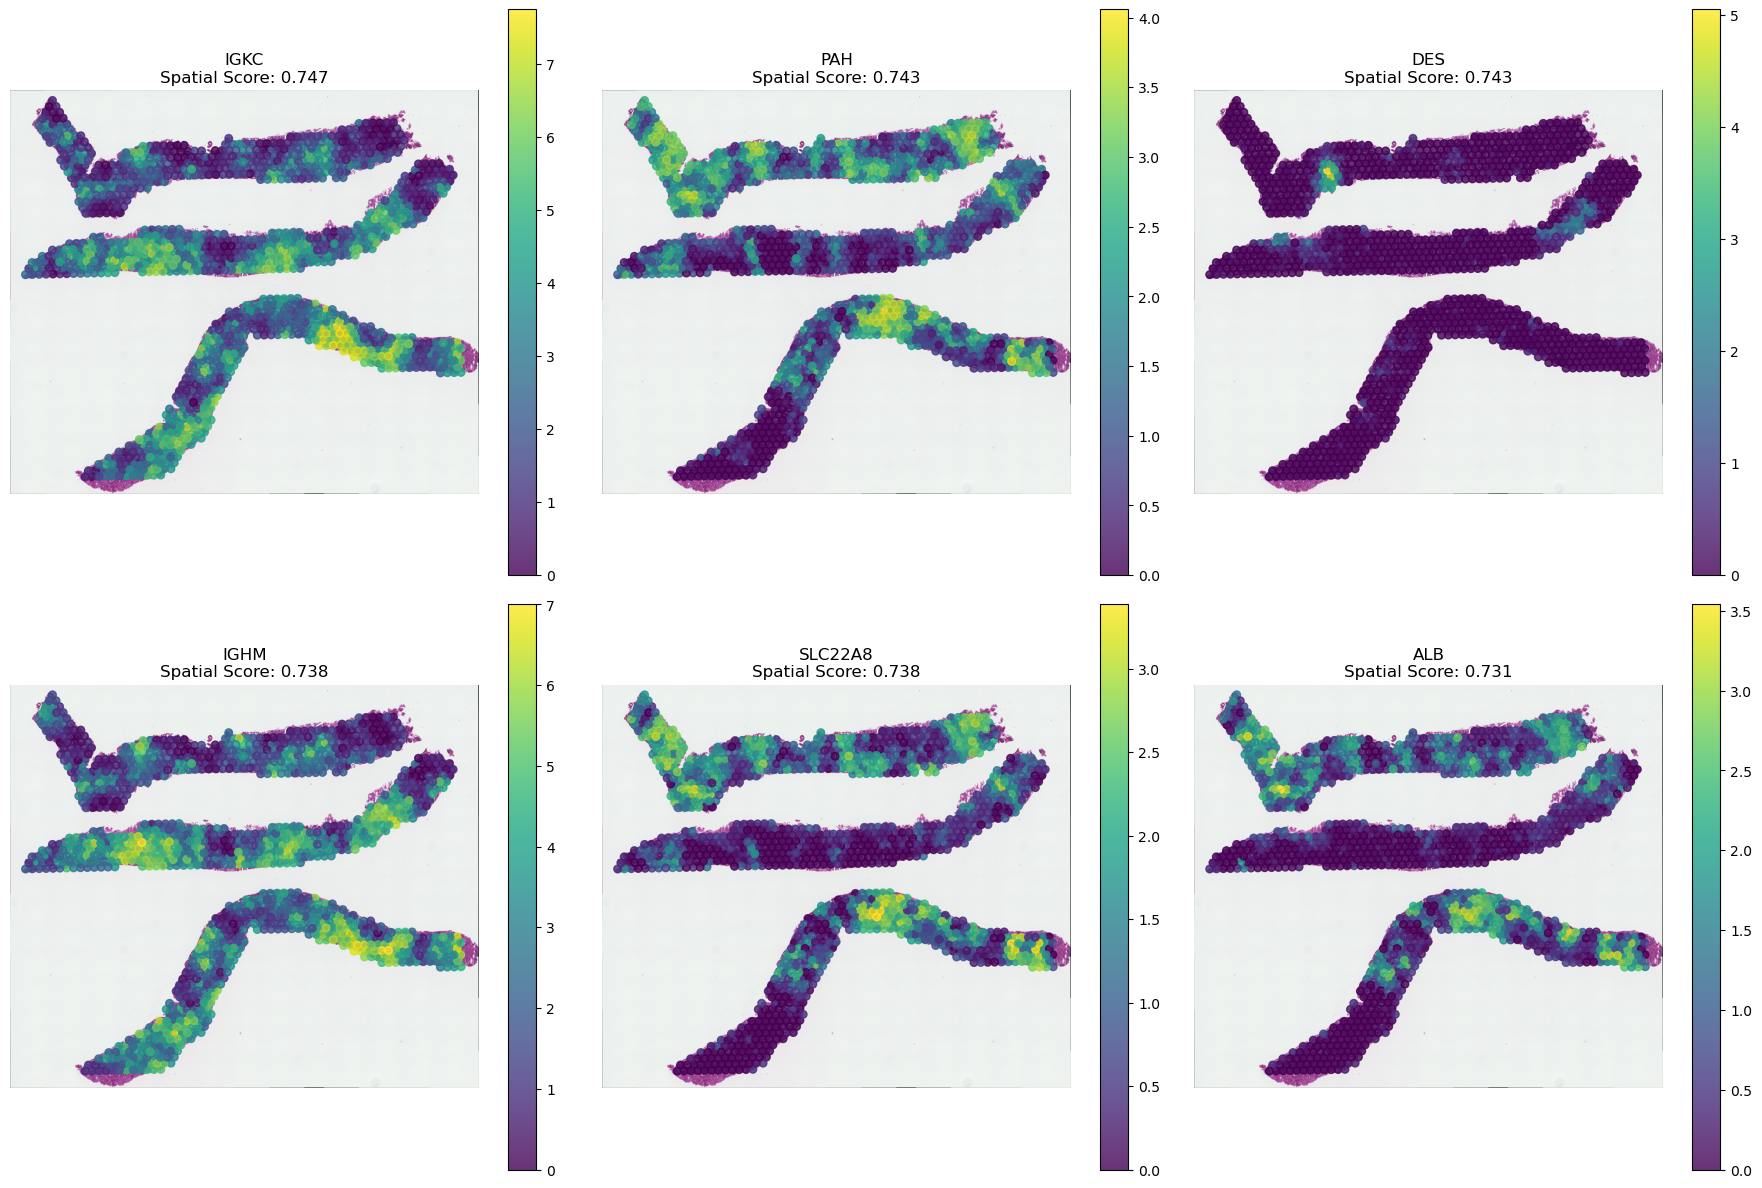

In [25]:
# Method 1: Using Squidpy (Corrected)
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse

# Load your data
adata = sc.read_h5ad(h5ad_file)

# Basic preprocessing
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

print("Building spatial neighborhood graph...")
# Calculate spatial neighbors
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

print("Calculating spatial autocorrelation...")
# Calculate Moran's I for spatial autocorrelation
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    n_perms=100,  # Number of permutations for p-value calculation
    n_jobs=1
)

# Check what columns are actually created
print("Available columns in adata.var after spatial analysis:")
print(adata.var.columns.tolist())

# Look for Moran's I related columns (they might have different names)
moran_cols = [col for col in adata.var.columns if 'moran' in col.lower()]
print(f"Moran's I related columns: {moran_cols}")

# Get the correct column name for Moran's I values
if moran_cols:
    moran_col = moran_cols[0]  # Use the first Moran's I column found
    spatial_results = adata.var.copy()
    spatial_results = spatial_results.sort_values(moran_col, ascending=False)
    
    # Get top 100 spatially variable genes
    top_100_svg = spatial_results.head(100)
    svg_gene_names = top_100_svg.index.tolist()
    
    print("Top 100 spatially variable genes:")
    print(top_100_svg[[moran_col]].head(20))
else:
    print("Moran's I columns not found. Using manual method...")

# Method 2: Manual Implementation (Robust Alternative)
def calculate_spatial_autocorr_manual(adata, n_neighbors=6):
    """
    Manual calculation of spatial autocorrelation using Moran's I
    """
    from sklearn.neighbors import NearestNeighbors
    
    coordinates = adata.obsm['spatial']
    
    # Build k-nearest neighbors
    print(f"Building {n_neighbors}-nearest neighbors graph...")
    nbrs = NearestNeighbors(n_neighbors=n_neighbors+1).fit(coordinates)  # +1 because it includes self
    distances, indices = nbrs.kneighbors(coordinates)
    
    # Get expression matrix
    if sparse.issparse(adata.X):
        X = adata.X.toarray()
    else:
        X = adata.X.copy()
    
    n_obs, n_vars = X.shape
    moran_scores = []
    
    print("Calculating Moran's I for all genes...")
    for gene_idx in range(n_vars):
        if gene_idx % 2000 == 0:
            print(f"Processing gene {gene_idx}/{n_vars}")
        
        gene_expr = X[:, gene_idx]
        
        # Skip genes with no expression
        if np.sum(gene_expr) == 0 or np.var(gene_expr) == 0:
            moran_scores.append(0)
            continue
        
        # Calculate Moran's I
        mean_expr = np.mean(gene_expr)
        total_deviation = np.sum((gene_expr - mean_expr) ** 2)
        
        if total_deviation == 0:
            moran_scores.append(0)
            continue
        
        # Calculate spatial autocorrelation
        numerator = 0
        weight_sum = 0
        
        for i in range(n_obs):
            # Get neighbors (excluding self - index 0)
            neighbors = indices[i, 1:]  # Skip self
            
            for neighbor_idx in neighbors:
                weight = 1  # Simple binary weights
                numerator += weight * (gene_expr[i] - mean_expr) * (gene_expr[neighbor_idx] - mean_expr)
                weight_sum += weight
        
        if weight_sum == 0:
            moran_scores.append(0)
        else:
            moran_i = (n_obs / weight_sum) * (numerator / total_deviation)
            moran_scores.append(moran_i)
    
    return np.array(moran_scores)

# Run manual calculation
print("Running manual Moran's I calculation...")
manual_moran_scores = calculate_spatial_autocorr_manual(adata, n_neighbors=6)

# Add to adata.var
adata.var['manual_morans_i'] = manual_moran_scores

# Get top 100 spatially variable genes
spatial_results_manual = adata.var.copy()
spatial_results_manual = spatial_results_manual.sort_values('manual_morans_i', ascending=False)

top_100_svg_manual = spatial_results_manual.head(100)
svg_gene_names_manual = top_100_svg_manual.index.tolist()

print("\nTop 100 spatially variable genes (Manual Moran's I):")
print(top_100_svg_manual[['manual_morans_i']].head(20))

# Method 3: Alternative using correlation with distance
def calculate_spatial_correlation(adata, max_distance=None):
    """
    Calculate spatial correlation using distance-based approach
    """
    from scipy.spatial.distance import pdist, squareform
    
    coordinates = adata.obsm['spatial']
    
    # Calculate pairwise distances
    print("Calculating pairwise distances...")
    distances = squareform(pdist(coordinates))
    
    # Set distance threshold if not provided
    if max_distance is None:
        max_distance = np.percentile(distances[distances > 0], 10)  # Use 10th percentile
    
    # Create binary adjacency matrix
    adj_matrix = (distances > 0) & (distances <= max_distance)
    
    # Get expression matrix
    if sparse.issparse(adata.X):
        X = adata.X.toarray()
    else:
        X = adata.X.copy()
    
    n_obs, n_vars = X.shape
    spatial_corr_scores = []
    
    print("Calculating spatial correlations...")
    for gene_idx in range(n_vars):
        if gene_idx % 2000 == 0:
            print(f"Processing gene {gene_idx}/{n_vars}")
        
        gene_expr = X[:, gene_idx]
        
        if np.var(gene_expr) == 0:
            spatial_corr_scores.append(0)
            continue
        
        # Calculate average correlation between nearby spots
        correlations = []
        for i in range(n_obs):
            neighbors = np.where(adj_matrix[i])[0]
            if len(neighbors) > 1:
                # Calculate correlation between spot i and its neighbors
                neighbor_expr = gene_expr[neighbors]
                if np.var(neighbor_expr) > 0:
                    corr = np.corrcoef(gene_expr[i], np.mean(neighbor_expr))[0, 1]
                    if not np.isnan(corr):
                        correlations.append(abs(corr))
        
        if correlations:
            spatial_corr_scores.append(np.mean(correlations))
        else:
            spatial_corr_scores.append(0)
    
    return np.array(spatial_corr_scores)

# Run distance-based correlation (alternative method)
print("\nRunning distance-based spatial correlation...")
spatial_corr_scores = calculate_spatial_correlation(adata)

# Add to adata.var
adata.var['spatial_correlation'] = spatial_corr_scores

# Get top 100 spatially variable genes
spatial_results_corr = adata.var.copy()
spatial_results_corr = spatial_results_corr.sort_values('spatial_correlation', ascending=False)

top_100_svg_corr = spatial_results_corr.head(100)
svg_gene_names_corr = top_100_svg_corr.index.tolist()

print("\nTop 100 spatially variable genes (Spatial Correlation):")
print(top_100_svg_corr[['spatial_correlation']].head(20))

# Compare methods if multiple are available
print("\n" + "="*50)
print("SUMMARY OF METHODS:")
print("="*50)

methods_available = []
if 'manual_morans_i' in adata.var.columns:
    methods_available.append(('Manual Moran\'s I', 'manual_morans_i', svg_gene_names_manual))
if 'spatial_correlation' in adata.var.columns:
    methods_available.append(('Spatial Correlation', 'spatial_correlation', svg_gene_names_corr))

for method_name, col_name, gene_list in methods_available:
    print(f"\n{method_name}:")
    print(f"Top 10 genes: {gene_list[:10]}")

# Use the first available method for final results
if methods_available:
    final_method_name, final_col_name, final_gene_list = methods_available[0]
    print(f"\nUsing {final_method_name} for final results")
    svg_gene_names = final_gene_list
    
    # Save results
    results_df = pd.DataFrame({
        'gene': svg_gene_names,
        'spatial_score': [adata.var.loc[gene, final_col_name] for gene in svg_gene_names],
        'method': final_method_name
    })
    
    results_df.to_csv('top_100_spatially_variable_genes.csv', index=False)
    print(f"Results saved to 'top_100_spatially_variable_genes.csv'")
else:
    print("No spatial analysis methods completed successfully")

# Visualization function
def plot_spatial_genes(adata, gene_names, wsi_file, n_genes=6):
    """
    Plot expression of top spatially variable genes on tissue
    """
    from PIL import Image, ImageFile
    import matplotlib.pyplot as plt
    
    # Load and downsample image
    Image.MAX_IMAGE_PIXELS = None
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = Image.open(wsi_file)
    scale = 16
    thumb = img.resize((img.width // scale, img.height // scale))
    thumb_np = np.array(thumb)
    
    # Get coordinates
    spatial_coords = adata.obsm['spatial']
    x = spatial_coords[:, 0]
    y = spatial_coords[:, 1]
    
    # Plot top genes
    n_genes = min(n_genes, len(gene_names))
    n_cols = 3
    n_rows = (n_genes + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 6*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for i, gene in enumerate(gene_names[:n_genes]):
        try:
            gene_idx = adata.var.index.get_loc(gene)
            if sparse.issparse(adata.X):
                expression = adata.X[:, gene_idx].toarray().flatten()
            else:
                expression = adata.X[:, gene_idx]
            
            axes[i].imshow(thumb_np)
            scatter = axes[i].scatter(x / scale, y / scale, 
                                     c=expression, 
                                     s=30, 
                                     cmap='viridis', 
                                     alpha=0.8)
            
            # Get spatial score for title
            spatial_score = 0
            for method_name, col_name, _ in methods_available:
                if col_name in adata.var.columns:
                    spatial_score = adata.var.loc[gene, col_name]
                    break
            
            axes[i].set_title(f'{gene}\nSpatial Score: {spatial_score:.3f}')
            axes[i].axis('off')
            plt.colorbar(scatter, ax=axes[i])
        except Exception as e:
            print(f"Error plotting gene {gene}: {e}")
            axes[i].axis('off')
    
    # Hide unused subplots
    for i in range(n_genes, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call visualization function
if 'svg_gene_names' in locals() and len(svg_gene_names) > 0:
    print("\nGenerating visualization...")
    plot_spatial_genes(adata, svg_gene_names, wsi_file, n_genes=6)

In [26]:
# Multi-Sample Spatial Variable Genes Analysis with Patch Extraction
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
import os
from pathlib import Path
import torch
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [31]:
# # Multi-Sample Spatial Variable Genes Analysis with Patch Extraction
# import squidpy as sq
# import scanpy as sc
# import pandas as pd
# import numpy as np
# from scipy import sparse
# import os
# from pathlib import Path
# import torch
# from PIL import Image, ImageFile
# import matplotlib.pyplot as plt
# from sklearn.neighbors import NearestNeighbors
# import warnings
# warnings.filterwarnings('ignore')

# # Try to import openslide for SVS support
# try:
#     import openslide
#     from openslide import OpenSlide
#     OPENSLIDE_AVAILABLE = True
#     print("OpenSlide available - SVS files supported")
# except ImportError:
#     OPENSLIDE_AVAILABLE = False
#     print("Warning: OpenSlide not available - SVS files may not work")
#     print("Install with: pip install openslide-python")

# # Try to import alternative libraries
# try:
#     import tifffile
#     TIFFFILE_AVAILABLE = True
# except ImportError:
#     TIFFFILE_AVAILABLE = False

# # Configuration
# Image.MAX_IMAGE_PIXELS = None
# ImageFile.LOAD_TRUNCATED_IMAGES = True

# def normalize_name(name):
#     """
#     Normalize filename by removing hyphens and underscores for comparison
#     """
#     return name.replace("-", "").replace("_", "").lower()

# def find_h5ad_and_wsi_files(h5ad_directory, wsi_directory):
#     """
#     Find matching h5ad and WSI files (ignoring hyphens and underscores in names)
#     """
#     h5ad_dir = Path(h5ad_directory)
#     wsi_dir = Path(wsi_directory)
    
#     # Find all h5ad files
#     h5ad_files = list(h5ad_dir.glob("*.h5ad"))
    
#     # Get all WSI subdirectories
#     wsi_subdirs = [d for d in wsi_dir.iterdir() if d.is_dir()]
    
#     # Create mapping of normalized names to actual directory names
#     wsi_name_mapping = {}
#     for wsi_subdir in wsi_subdirs:
#         normalized = normalize_name(wsi_subdir.name)
#         wsi_name_mapping[normalized] = wsi_subdir
    
#     file_pairs = []
#     for h5ad_file in h5ad_files:
#         sample_name = h5ad_file.stem  # filename without extension
#         normalized_sample = normalize_name(sample_name)
        
#         # Look for corresponding WSI directory using normalized names
#         matching_wsi_dir = None
#         actual_wsi_name = None
        
#         if normalized_sample in wsi_name_mapping:
#             matching_wsi_dir = wsi_name_mapping[normalized_sample]
#             actual_wsi_name = matching_wsi_dir.name
        
#         if matching_wsi_dir and matching_wsi_dir.exists():
#             # Find WSI file in the subdirectory (looking for common image formats)
#             wsi_extensions = ['*.tif', '*.tiff', '*.svs', '*.ndpi', '*.vms', '*.vmu', '*.scn']
#             wsi_file = None
            
#             for ext in wsi_extensions:
#                 wsi_files = list(matching_wsi_dir.glob(ext))
#                 if wsi_files:
#                     wsi_file = wsi_files[0]  # Take the first matching file
#                     break
            
#             if wsi_file:
#                 file_pairs.append((str(h5ad_file), str(wsi_file), sample_name))
#                 print(f"Found pair: {sample_name} <-> {actual_wsi_name}")
#             else:
#                 print(f"Warning: No WSI file found in {actual_wsi_name}")
#         else:
#             print(f"Warning: No matching WSI directory found for {sample_name}")
#             # Show available directories for debugging
#             available_dirs = [d.name for d in wsi_subdirs]
#             print(f"  Available WSI directories: {available_dirs}")
    
#     return file_pairs

# def calculate_spatial_autocorr_manual(adata, n_neighbors=6):
#     """
#     Manual calculation of spatial autocorrelation using Moran's I
#     """
#     coordinates = adata.obsm['spatial']
    
#     # Build k-nearest neighbors
#     nbrs = NearestNeighbors(n_neighbors=n_neighbors+1).fit(coordinates)
#     distances, indices = nbrs.kneighbors(coordinates)
    
#     # Get expression matrix
#     if sparse.issparse(adata.X):
#         X = adata.X.toarray()
#     else:
#         X = adata.X.copy()
    
#     n_obs, n_vars = X.shape
#     moran_scores = []
    
#     for gene_idx in range(n_vars):
#         gene_expr = X[:, gene_idx]
        
#         # Skip genes with no expression or no variance
#         if np.sum(gene_expr) == 0 or np.var(gene_expr) == 0:
#             moran_scores.append(0)
#             continue
        
#         # Calculate Moran's I
#         mean_expr = np.mean(gene_expr)
#         total_deviation = np.sum((gene_expr - mean_expr) ** 2)
        
#         if total_deviation == 0:
#             moran_scores.append(0)
#             continue
        
#         # Calculate spatial autocorrelation
#         numerator = 0
#         weight_sum = 0
        
#         for i in range(n_obs):
#             neighbors = indices[i, 1:]  # Skip self
            
#             for neighbor_idx in neighbors:
#                 weight = 1  # Binary weights
#                 numerator += weight * (gene_expr[i] - mean_expr) * (gene_expr[neighbor_idx] - mean_expr)
#                 weight_sum += weight
        
#         if weight_sum == 0:
#             moran_scores.append(0)
#         else:
#             moran_i = (n_obs / weight_sum) * (numerator / total_deviation)
#             moran_scores.append(moran_i)
    
#     return np.array(moran_scores)

# def process_single_sample(h5ad_file, sample_name):
#     """
#     Process a single sample and return Moran's I scores
#     """
#     print(f"Processing {sample_name}...")
    
#     # Load data
#     adata = sc.read_h5ad(h5ad_file)
    
#     # Preprocessing
#     sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
#     sc.pp.normalize_total(adata, target_sum=1e4)
#     sc.pp.log1p(adata)
    
#     # Calculate spatial autocorrelation
#     moran_scores = calculate_spatial_autocorr_manual(adata, n_neighbors=6)
    
#     # Create results dataframe
#     results_df = pd.DataFrame({
#         'gene': adata.var.index,
#         'moran_i': moran_scores,
#         'sample': sample_name
#     })
    
#     return results_df, adata

# def find_common_genes_and_top_svg(file_pairs, top_n=100):
#     """
#     Find common genes across all samples and identify top SVGs
#     """
#     print("Processing all samples...")
    
#     all_results = []
#     sample_data = {}
#     all_genes_sets = []
    
#     # Process each sample
#     for h5ad_file, wsi_file, sample_name in file_pairs:
#         try:
#             results_df, adata = process_single_sample(h5ad_file, sample_name)
#             all_results.append(results_df)
#             sample_data[sample_name] = {
#                 'adata': adata,
#                 'wsi_file': wsi_file,
#                 'results': results_df
#             }
#             all_genes_sets.append(set(results_df['gene']))
#             print(f"  - {sample_name}: {len(results_df)} genes")
#         except Exception as e:
#             print(f"Error processing {sample_name}: {e}")
#             continue
    
#     if not all_results:
#         raise ValueError("No samples processed successfully")
    
#     # Find common genes across all samples
#     common_genes = set.intersection(*all_genes_sets)
#     print(f"\nFound {len(common_genes)} common genes across {len(all_results)} samples")
    
#     # Calculate average Moran's I across samples for common genes
#     print("Calculating average spatial autocorrelation across samples...")
    
#     gene_avg_moran = {}
#     for gene in common_genes:
#         moran_values = []
#         for results_df in all_results:
#             gene_moran = results_df[results_df['gene'] == gene]['moran_i'].iloc[0]
#             moran_values.append(gene_moran)
#         gene_avg_moran[gene] = np.mean(moran_values)
    
#     # Get top SVGs
#     sorted_genes = sorted(gene_avg_moran.items(), key=lambda x: x[1], reverse=True)
#     top_svg_genes = [gene for gene, score in sorted_genes[:top_n]]
    
#     print(f"\nTop {top_n} spatially variable genes:")
#     for i, (gene, score) in enumerate(sorted_genes[:20]):  # Show top 20
#         print(f"{i+1:2d}. {gene}: {score:.4f}")
    
#     return top_svg_genes, sample_data, gene_avg_moran

# def load_wsi_image(wsi_file):
#     """
#     Load WSI image using appropriate library based on file format
#     """
#     wsi_path = Path(wsi_file)
#     file_extension = wsi_path.suffix.lower()
    
#     print(f"  Loading WSI: {wsi_path.name} (format: {file_extension})")
    
#     # Try OpenSlide first for SVS and other whole slide formats
#     if OPENSLIDE_AVAILABLE and file_extension in ['.svs', '.ndpi', '.vms', '.vmu', '.scn', '.mrxs', '.tiff', '.tif']:
#         try:
#             print("  Using OpenSlide...")
#             slide = OpenSlide(str(wsi_file))
            
#             # Get the best level for processing (usually level 0 = highest resolution)
#             level = 0
#             dimensions = slide.level_dimensions[level]
#             print(f"  Image dimensions: {dimensions[0]} x {dimensions[1]}")
            
#             # For very large images, use a lower resolution level
#             if dimensions[0] > 50000 or dimensions[1] > 50000:
#                 # Find a more manageable level
#                 for i, dim in enumerate(slide.level_dimensions):
#                     if dim[0] <= 50000 and dim[1] <= 50000:
#                         level = i
#                         dimensions = dim
#                         print(f"  Using level {level} with dimensions: {dimensions[0]} x {dimensions[1]}")
#                         break
            
#             # Read the image at the selected level
#             img_pil = slide.read_region((0, 0), level, dimensions)
            
#             # Convert RGBA to RGB if necessary
#             if img_pil.mode == 'RGBA':
#                 # Create white background
#                 background = Image.new('RGB', img_pil.size, (255, 255, 255))
#                 background.paste(img_pil, mask=img_pil.split()[-1])  # Use alpha channel as mask
#                 img_pil = background
#             elif img_pil.mode != 'RGB':
#                 img_pil = img_pil.convert('RGB')
            
#             slide.close()
            
#             # Calculate the scaling factor if we used a different level
#             scale_factor = slide.level_downsamples[level] if level > 0 else 1.0
            
#             return img_pil, scale_factor
            
#         except Exception as e:
#             print(f"  OpenSlide failed: {e}")
#             # Fall through to try other methods
    
#     # Try PIL for standard formats
#     if file_extension in ['.tif', '.tiff', '.jpg', '.jpeg', '.png']:
#         try:
#             print("  Using PIL...")
#             img_pil = Image.open(wsi_file)
#             if img_pil.mode != 'RGB':
#                 img_pil = img_pil.convert('RGB')
#             return img_pil, 1.0
#         except Exception as e:
#             print(f"  PIL failed: {e}")
    
#     # Try tifffile for TIFF files
#     if TIFFFILE_AVAILABLE and file_extension in ['.tif', '.tiff']:
#         try:
#             print("  Using tifffile...")
#             img_array = tifffile.imread(wsi_file)
            
#             # Handle different array shapes
#             if len(img_array.shape) == 3:
#                 if img_array.shape[2] == 3:  # RGB
#                     img_pil = Image.fromarray(img_array)
#                 elif img_array.shape[2] == 4:  # RGBA
#                     img_pil = Image.fromarray(img_array[:, :, :3])
#                 else:
#                     img_pil = Image.fromarray(img_array[:, :, 0])  # Take first channel
#                     img_pil = img_pil.convert('RGB')
#             else:  # Grayscale
#                 img_pil = Image.fromarray(img_array)
#                 img_pil = img_pil.convert('RGB')
            
#             return img_pil, 1.0
#         except Exception as e:
#             print(f"  Tifffile failed: {e}")
    
#     # If all methods fail
#     raise ValueError(f"Cannot load image file: {wsi_file}. Tried OpenSlide, PIL, and tifffile.")

# def extract_patches_around_spots(adata, wsi_file, patch_size=224, mpp=0.5):
#     """
#     Extract patches around each spot at specified resolution
#     """
#     try:
#         # Load WSI using appropriate method
#         img, scale_factor = load_wsi_image(wsi_file)
#         print(f"  Successfully loaded image with scale factor: {scale_factor}")
        
#     except Exception as e:
#         print(f"  Failed to load WSI: {e}")
#         return np.array([]), []
    
#     # Get spot coordinates
#     spatial_coords = adata.obsm['spatial']
    
#     # Adjust coordinates for scale factor if using lower resolution level
#     if scale_factor != 1.0:
#         print(f"  Adjusting coordinates for scale factor: {scale_factor}")
#         spatial_coords = spatial_coords / scale_factor
    
#     patches = []
#     valid_indices = []
    
#     half_patch = patch_size // 2
    
#     print(f"  Extracting patches from {len(spatial_coords)} spots...")
    
#     for i, (x, y) in enumerate(spatial_coords):
#         try:
#             # Convert coordinates to integers
#             x_int, y_int = int(x), int(y)
            
#             # Calculate patch boundaries
#             left = max(0, x_int - half_patch)
#             top = max(0, y_int - half_patch)
#             right = min(img.width, x_int + half_patch)
#             bottom = min(img.height, y_int + half_patch)
            
#             # Check if patch is large enough (at least 80% of target size)
#             patch_width = right - left
#             patch_height = bottom - top
#             min_size = int(patch_size * 0.8)
            
#             if patch_width >= min_size and patch_height >= min_size:
#                 # Extract patch
#                 patch = img.crop((left, top, right, bottom))
                
#                 # Resize to exact patch size if needed
#                 if patch.size != (patch_size, patch_size):
#                     patch = patch.resize((patch_size, patch_size), Image.LANCZOS)
                
#                 # Convert to array
#                 patch_array = np.array(patch)
                
#                 # Ensure it's RGB
#                 if len(patch_array.shape) == 3 and patch_array.shape[2] == 3:
#                     patches.append(patch_array)
#                     valid_indices.append(i)
                
#         except Exception as e:
#             if i < 10:  # Only print first 10 errors to avoid spam
#                 print(f"    Error extracting patch for spot {i}: {e}")
#             continue
    
#     print(f"  Successfully extracted {len(patches)} patches out of {len(spatial_coords)} spots")
    
#     return np.array(patches), valid_indices

# def save_sample_data(sample_name, adata, top_svg_genes, patches, valid_indices, output_dir):
#     """
#     Save patches and expression data for a sample
#     """
#     sample_output_dir = Path(output_dir) / sample_name
#     sample_output_dir.mkdir(parents=True, exist_ok=True)
    
#     # Create patches subdirectory for PNG files
#     patches_png_dir = sample_output_dir / 'patches_png'
#     patches_png_dir.mkdir(exist_ok=True)
    
#     # Filter adata to valid spots and top SVG genes
#     adata_filtered = adata[valid_indices, :].copy()
    
#     # Get indices of top SVG genes
#     svg_gene_indices = [adata_filtered.var.index.get_loc(gene) for gene in top_svg_genes 
#                        if gene in adata_filtered.var.index]
    
#     # Extract expression data for top SVG genes
#     if sparse.issparse(adata_filtered.X):
#         svg_expression = adata_filtered.X[:, svg_gene_indices].toarray()
#     else:
#         svg_expression = adata_filtered.X[:, svg_gene_indices]
    
#     # Save patches as numpy array
#     np.save(sample_output_dir / 'patches.npy', patches)
    
#     # Save individual patches as PNG files
#     print(f"  Saving {len(patches)} individual PNG patches...")
#     for i, patch in enumerate(patches):
#         # Convert patch to PIL Image
#         if patch.dtype != np.uint8:
#             # Convert to uint8 if needed
#             if patch.max() <= 1.0:
#                 patch_uint8 = (patch * 255).astype(np.uint8)
#             else:
#                 patch_uint8 = patch.astype(np.uint8)
#         else:
#             patch_uint8 = patch
        
#         # Create PIL Image
#         patch_img = Image.fromarray(patch_uint8)
        
#         # Save as PNG with spot index in filename
#         spot_idx = valid_indices[i]
#         png_filename = f"patch_{spot_idx:04d}.png"
#         patch_img.save(patches_png_dir / png_filename)
    
#     # Save expression data as PyTorch tensor
#     svg_tensor = torch.tensor(svg_expression, dtype=torch.float32)
#     torch.save({
#         'expression': svg_tensor,
#         'genes': [top_svg_genes[i] for i in range(len(svg_gene_indices))],
#         'spot_coordinates': adata_filtered.obsm['spatial'],
#         'spot_indices': valid_indices
#     }, sample_output_dir / 'svg_expression.pt')
    
#     # Save metadata
#     metadata = {
#         'sample_name': sample_name,
#         'n_spots': len(valid_indices),
#         'n_patches': len(patches),
#         'n_svg_genes': len(svg_gene_indices),
#         'patch_size': patches.shape[1:3] if len(patches) > 0 else (0, 0),
#         'svg_genes': [top_svg_genes[i] for i in range(len(svg_gene_indices))]
#     }
    
#     pd.DataFrame([metadata]).to_csv(sample_output_dir / 'metadata.csv', index=False)
    
#     print(f"  Saved {len(patches)} patches (numpy + PNG) and expression data for {len(svg_gene_indices)} SVG genes")
    
#     return len(patches), len(svg_gene_indices)

# def main_analysis(h5ad_directory, wsi_directory, output_directory, top_n_svg=100, patch_size=224, mpp=0.5):
#     """
#     Main analysis pipeline
#     """
#     print("="*60)
#     print("MULTI-SAMPLE SPATIAL VARIABLE GENES ANALYSIS")
#     print("="*60)
    
#     # Create output directory
#     output_dir = Path(output_directory)
#     output_dir.mkdir(parents=True, exist_ok=True)
    
#     # Find file pairs
#     print("Finding h5ad and WSI file pairs...")
#     file_pairs = find_h5ad_and_wsi_files(h5ad_directory, wsi_directory)
    
#     if len(file_pairs) == 0:
#         raise ValueError("No matching h5ad and WSI file pairs found")
    
#     print(f"Found {len(file_pairs)} file pairs")
    
#     # Find common genes and top SVGs
#     top_svg_genes, sample_data, gene_avg_moran = find_common_genes_and_top_svg(file_pairs, top_n_svg)
    
#     # Save overall results
#     svg_results = pd.DataFrame({
#         'gene': top_svg_genes,
#         'avg_moran_i': [gene_avg_moran[gene] for gene in top_svg_genes],
#         'rank': range(1, len(top_svg_genes) + 1)
#     })
#     svg_results.to_csv(output_dir / 'top_svg_genes.csv', index=False)
    
#     # Process each sample
#     print(f"\nExtracting patches and saving data...")
#     summary_stats = []
    
#     for sample_name, data in sample_data.items():
#         print(f"Processing {sample_name}...")
#         adata = data['adata']
#         wsi_file = data['wsi_file']
        
#         try:
#             # Extract patches
#             patches, valid_indices = extract_patches_around_spots(
#                 adata, wsi_file, patch_size, mpp
#             )
            
#             if len(patches) > 0:
#                 # Save data
#                 n_patches, n_genes = save_sample_data(
#                     sample_name, adata, top_svg_genes, patches, valid_indices, output_dir
#                 )
                
#                 summary_stats.append({
#                     'sample': sample_name,
#                     'total_spots': adata.n_obs,
#                     'valid_patches': n_patches,
#                     'svg_genes': n_genes,
#                     'success': True
#                 })
#             else:
#                 print(f"  Warning: No valid patches extracted for {sample_name}")
#                 summary_stats.append({
#                     'sample': sample_name,
#                     'total_spots': adata.n_obs,
#                     'valid_patches': 0,
#                     'svg_genes': 0,
#                     'success': False
#                 })
                
#         except Exception as e:
#             print(f"  Error processing {sample_name}: {e}")
#             summary_stats.append({
#                 'sample': sample_name,
#                 'total_spots': adata.n_obs if 'adata' in locals() else 0,
#                 'valid_patches': 0,
#                 'svg_genes': 0,
#                 'success': False
#             })
    
#     # Save summary
#     summary_df = pd.DataFrame(summary_stats)
#     summary_df.to_csv(output_dir / 'processing_summary.csv', index=False)
    
#     print("\n" + "="*60)
#     print("ANALYSIS COMPLETE")
#     print("="*60)
#     print(f"Output directory: {output_dir}")
#     print(f"Top {top_n_svg} SVG genes saved to: top_svg_genes.csv")
#     print(f"Processing summary saved to: processing_summary.csv")
#     print(f"Individual sample data saved in subdirectories")
    
#     # Print summary statistics
#     total_samples = len(summary_df)
#     successful_samples = summary_df['success'].sum()
#     total_patches = summary_df['valid_patches'].sum()
    
#     print(f"\nSummary Statistics:")
#     print(f"  Total samples: {total_samples}")
#     print(f"  Successful samples: {successful_samples}")
#     print(f"  Total patches extracted: {total_patches}")
#     print(f"  Average patches per successful sample: {total_patches/max(successful_samples, 1):.1f}")
    
#     return top_svg_genes, summary_df

# # Example usage
# if __name__ == "__main__":
#     # Set your directories here
#     h5ad_directory = '/blue/pinaki.sarder/j.fermin/CellAtlas/data/Kidney/H5AD_files/'
#     wsi_directory = '/blue/pinaki.sarder/j.fermin/Annotations/Data/'

#     output_directory = "/orange/pinaki.sarder/h.lohaan/Hari_data_pipeline/"
    
#     # Run analysis
#     top_svg_genes, summary = main_analysis(
#         h5ad_directory=h5ad_directory,
#         wsi_directory=wsi_directory,
#         output_directory=output_directory,
#         top_n_svg=100,
#         patch_size=224,
#         mpp=0.5
#     )
    
#     print(f"\nTop 10 SVG genes: {top_svg_genes[:10]}")

# # Additional utility functions for loading saved data
# def load_sample_data(sample_path):
#     """
#     Load saved sample data
#     """
#     sample_path = Path(sample_path)
    
#     # Load patches
#     patches = np.load(sample_path / 'patches.npy')
    
#     # Load expression data
#     expression_data = torch.load(sample_path / 'svg_expression.pt')
    
#     # Load metadata
#     metadata = pd.read_csv(sample_path / 'metadata.csv').iloc[0].to_dict()
    
#     return { 
#         'patches': patches,
#         'expression': expression_data['expression'],
#         'genes': expression_data['genes'],
#         'coordinates': expression_data['spot_coordinates'],
#         'spot_indices': expression_data['spot_indices'],
#         'metadata': metadata
#     }

# def visualize_sample_patches(sample_path, n_patches=9):
#     """
#     Visualize patches from a sample
#     """
#     data = load_sample_data(sample_path)
#     patches = data['patches']
    
#     if len(patches) == 0:
#         print("No patches to visualize")
#         return
    
#     n_patches = min(n_patches, len(patches))
#     n_cols = 3
#     n_rows = (n_patches + n_cols - 1) // n_cols
    
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
#     if n_rows == 1:
#         axes = axes.reshape(1, -1)
#     axes = axes.flatten()
    
#     for i in range(n_patches):
#         axes[i].imshow(patches[i])
#         axes[i].set_title(f'Patch {i+1}')
#         axes[i].axis('off')
    
#     # Hide unused subplots
#     for i in range(n_patches, len(axes)):
#         axes[i].axis('off')
    
#     plt.tight_layout()
#     plt.show()
    
#     print(f"Sample: {data['metadata']['sample_name']}")
#     print(f"Total patches: {len(patches)}")
#     print(f"Patch size: {patches[0].shape}")
#     print(f"SVG genes: {len(data['genes'])}")

Install with: pip install openslide-python
MULTI-SAMPLE SPATIAL VARIABLE GENES ANALYSIS
Finding h5ad and WSI file pairs...
Found pair: XY02_IU-21-016F <-> XY02-IU-21-016F
Found pair: XY01_IU-21-015F <-> XY01_IU-21-015F
Found pair: V42N07-395_XY04_235582 <-> V42N07-395_XY04_235582
Found pair: V42N07-399_XY01_3723 <-> V42N07-399_XY01_3723
Found pair: XY04_IU-21-020F <-> XY04_IU-21-020F
Found pair: V42N07-339_XY01_3781 <-> V42N07-339_XY01_3781
Found pair: XY03_IU-21-019F <-> XY03_IU-21-019F
Found pair: V42N07-395_XY01_235142 <-> V42N07-395_XY01_235142
Found pair: V42D20-364_XY01_2235505 <-> V42D20-364_XY01_2235505
Found pair: V42D20-364_XY04_2240610 <-> V42D20-364_XY04_2240610
Found pair: V42N07-339_XY04_F44 <-> V42N07-339_XY04_F44
Found 11 file pairs
Processing all samples...
Processing XY02_IU-21-016F...
  - XY02_IU-21-016F: 14294 genes
Processing XY01_IU-21-015F...
  - XY01_IU-21-015F: 14808 genes
Processing V42N07-395_XY04_235582...
  - V42N07-395_XY04_235582: 18013 genes
Processing V

In [24]:
# sub group cell type csv
import pandas as pd 


def create_cell_type_dictionary(csv_file_path):
    # Read the CSV file
    df = pd.read_csv(csv_file_path)
    
    # Create dictionary to store results
    cell_type_dict = {}
    
    # Process each row
    for index, row in df.iterrows():
        main_type = row['Main_Types']
        sub_types = row['Sub_Types']
        
        # Split subtypes by '.' to get individual subtypes
        subtype_list = sub_types.split('.')
        
        # Add to dictionary
        cell_type_dict[main_type] = subtype_list
    
    return cell_type_dict

# Create the dictionary
csv_data = '/orange/pinaki.sarder/j.fermin/SpatNet/Data/Counts/Cell_SubTypes_Grouped.csv'

result = create_cell_type_dictionary(csv_data)

# Print the results
print("Cell Type Dictionary:")
print("=" * 50)

print(result)



#

Cell Type Dictionary:
{'PT': ['PT', 'PT-S1', 'PT-S2', 'PT-S3', 'aPT', 'cycPT', 'dPT', 'dPT/DTL'], 'DTL': ['DTL', 'DTL1', 'DTL2', 'DTL3', 'dDTL3'], 'ATL': ['ATL', 'dATL'], 'TAL': ['TAL', 'aTAL1', 'aTAL2', 'M-TAL', 'dM-TAL', 'C-TAL', 'dC-TAL', 'MD'], 'DCT': ['DCT', 'DCT1', 'DCT2', 'dDCT', 'cycDCT'], 'CNT': ['CNT', 'CNT-PC', 'dCNT', 'cycCNT'], 'PC': ['PC', 'C-PC', 'CCD-PC', 'OMCD-PC', 'M-PC', 'dOMCD-PC', 'dM-PC', 'IMCD', 'dIMCD'], 'IC': ['IC', 'C-IC-A', 'CCD-IC-A', 'CNT-IC-A', 'dC-IC-A', 'OMCD-IC-A', 'M-IC-A', 'tPC-IC', 'IC-B'], 'PapE': ['PapE'], 'POD': ['POD', 'dPOD'], 'PEC': ['PEC'], 'EC': ['EC', 'EC-GC', 'EC-AEA', 'EC-DVR', 'EC-PTC', 'dEC-PTC', 'EC-AVR', 'dEC', 'cycEC', 'EC-LYM'], 'VSM/P': ['VSM/P', 'MC', 'REN', 'VSMC', 'VSMC/P', 'dVSMC'], 'FIB': ['FIB', 'MYOF', 'cycMYOF', 'M-FIB', 'dM-FIB', 'aFIB', 'dFIB'], 'IMM': ['IMM', 'B', 'PL', 'T', 'NKT', 'MAST', 'MAC-M2', 'cycMNP', 'MDC', 'cDC', 'pDC', 'ncMON', 'N'], 'NEU': ['NEU', 'SC/NEU']}


In [28]:
import pandas as pd
import numpy as np


def create_subtype_to_maintype_mapping(cell_type_dict):
    """
    Create reverse mapping from subtype to main type for easy lookup.
    """
    subtype_to_maintype = {}
    for main_type, subtypes in cell_type_dict.items():
        for subtype in subtypes:
            subtype_to_maintype[subtype] = main_type
    return subtype_to_maintype

def aggregate_by_cell_type(csv_file_path, output_file_path=None):
    """
    Aggregate CSV data by main cell types based on the cell type dictionary.
    
    Args:
        csv_file_path (str): Path to the input CSV file
        output_file_path (str, optional): Path to save the aggregated results
    
    Returns:
        pd.DataFrame: Aggregated data with main cell types as rows
    """
    # Read the CSV file
    print(f"Reading CSV file: {csv_file_path}")
    df = pd.read_csv(csv_file_path)
    
    # Display basic info about the input data
    print(f"Input data shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"First few rows of first column: {df.iloc[:5, 0].tolist()}")
    
    # Get cell type mappings
    cell_type_dict = result
    subtype_to_maintype = create_subtype_to_maintype_mapping(cell_type_dict)
    
    # Assume first column contains the subtypes
    subtype_column = df.columns[0]
    
    # Add a column for main cell type
    df['Main_Type'] = df[subtype_column].map(subtype_to_maintype)
    
    # Check for unmapped subtypes
    unmapped = df[df['Main_Type'].isna()]
    if not unmapped.empty:
        print(f"Warning: Found {len(unmapped)} unmapped subtypes:")
        print(unmapped[subtype_column].tolist())
    
    # Remove unmapped rows
    df_mapped = df.dropna(subset=['Main_Type'])
    
    # Get numeric columns for aggregation (exclude the subtype column and Main_Type)
    numeric_columns = df_mapped.select_dtypes(include=[np.number]).columns.tolist()
    if subtype_column in numeric_columns:
        numeric_columns.remove(subtype_column)
    
    print(f"Aggregating {len(numeric_columns)} numeric columns: {numeric_columns}")
    
    # Aggregate by main cell type (sum all values)
    aggregated = df_mapped.groupby('Main_Type')[numeric_columns].sum().reset_index()
    
    # Sort by main type for consistent output
    aggregated = aggregated.sort_values('Main_Type').reset_index(drop=True)
    
    print(f"Aggregated data shape: {aggregated.shape}")
    print("Aggregation complete!")
    
    # Save to file if output path provided
    if output_file_path:
        aggregated.to_csv(output_file_path, index=False)
        print(f"Aggregated data saved to: {output_file_path}")
    
    return aggregated

def display_aggregation_summary(aggregated_df):
    """
    Display a summary of the aggregation results.
    """
    print("\n" + "="*50)
    print("AGGREGATION SUMMARY")
    print("="*50)
    
    print(f"Number of main cell types: {len(aggregated_df)}")
    print(f"Main cell types: {aggregated_df['Main_Type'].tolist()}")
    
    # Show first few rows
    print("\nFirst 5 rows of aggregated data:")
    print(aggregated_df.head())
    
    # Show column totals
    numeric_cols = aggregated_df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\nColumn totals:")
        for col in numeric_cols:
            total = aggregated_df[col].sum()
            print(f"  {col}: {total:,.2f}")



aggregated_data = aggregate_by_cell_type('/orange/pinaki.sarder/j.fermin/SpatNet/Data/Counts/FFPE/CellTypes_SpotLevel/All_Counts/V42D20-364_XY01_2235505counts.csv', 'aggregated_results.csv')
display_aggregation_summary(aggregated_data)


Reading CSV file: /orange/pinaki.sarder/j.fermin/SpatNet/Data/Counts/FFPE/CellTypes_SpotLevel/All_Counts/V42D20-364_XY01_2235505counts.csv
Input data shape: (74, 1204)
Columns: ['Unnamed: 0', 'AACACGTGCATCGCAC-1', 'AACAGGTTATTGCACC-1', 'AACATCTTAAGGCTCA-1', 'AACATGACGCAGCGTG-1', 'AACCAAGGTATCAGGC-1', 'AACCGCCAGACTACTT-1', 'AACCTAAGATACTGAG-1', 'AACGTCGCGACAAGGT-1', 'AACTAGCACTGTTCGA-1', 'AACTAGCCTTGCAATA-1', 'AACTATTCTGCGGCCT-1', 'AACTCAACCTTGACCA-1', 'AACTCACCTCGGTGTT-1', 'AACTCAGATCCATGCC-1', 'AACTGCTACCTCGATA-1', 'AACTTCAGATACTACC-1', 'AACTTCGCTTAGTCAG-1', 'AACTTGCAACTTGGAC-1', 'AAGAATTCTGGCTGCA-1', 'AAGACAATCTCCTGCA-1', 'AAGACTCAAGGCTCCA-1', 'AAGATTATCTAGCATA-1', 'AAGCAGCGGACACGTG-1', 'AAGCAGTGTACACCGC-1', 'AAGCATTGAGTGGTTG-1', 'AAGCCAGATCCAACAT-1', 'AAGCCAGGCTGCTTGA-1', 'AAGGCCGACTATGTAA-1', 'AAGGCGACGGTGTCGG-1', 'AAGGCGCCGACAATCT-1', 'AAGGTTGCAGAAGCAG-1', 'AAGTACTAAGGTTACG-1', 'AAGTACTACAGTAGAA-1', 'AAGTACTGGATGCGCA-1', 'AAGTCGCTATCCTGTC-1', 'AAGTCGGACACTTCAG-1', 'AAGTCTACGCACTCG

Aggregating 1203 numeric columns: ['AACACGTGCATCGCAC-1', 'AACAGGTTATTGCACC-1', 'AACATCTTAAGGCTCA-1', 'AACATGACGCAGCGTG-1', 'AACCAAGGTATCAGGC-1', 'AACCGCCAGACTACTT-1', 'AACCTAAGATACTGAG-1', 'AACGTCGCGACAAGGT-1', 'AACTAGCACTGTTCGA-1', 'AACTAGCCTTGCAATA-1', 'AACTATTCTGCGGCCT-1', 'AACTCAACCTTGACCA-1', 'AACTCACCTCGGTGTT-1', 'AACTCAGATCCATGCC-1', 'AACTGCTACCTCGATA-1', 'AACTTCAGATACTACC-1', 'AACTTCGCTTAGTCAG-1', 'AACTTGCAACTTGGAC-1', 'AAGAATTCTGGCTGCA-1', 'AAGACAATCTCCTGCA-1', 'AAGACTCAAGGCTCCA-1', 'AAGATTATCTAGCATA-1', 'AAGCAGCGGACACGTG-1', 'AAGCAGTGTACACCGC-1', 'AAGCATTGAGTGGTTG-1', 'AAGCCAGATCCAACAT-1', 'AAGCCAGGCTGCTTGA-1', 'AAGGCCGACTATGTAA-1', 'AAGGCGACGGTGTCGG-1', 'AAGGCGCCGACAATCT-1', 'AAGGTTGCAGAAGCAG-1', 'AAGTACTAAGGTTACG-1', 'AAGTACTACAGTAGAA-1', 'AAGTACTGGATGCGCA-1', 'AAGTCGCTATCCTGTC-1', 'AAGTCGGACACTTCAG-1', 'AAGTCTACGCACTCGG-1', 'AAGTCTGTCAATTCTT-1', 'AAGTGGCGAAGTTAAT-1', 'AAGTGGCGAGTGTACA-1', 'AATAACATGTTACGTC-1', 'AATAACGTATTGAACA-1', 'AATACGAGAACACTCG-1', 'AATAGATAGCCTAACC-1

In [30]:
import os
import glob


def run_aggregation_for_folder(folder_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

    for csv_path in csv_files:
        filename = os.path.basename(csv_path)
        output_filename = f'aggregate_{filename}'
        output_path = os.path.join(output_folder, output_filename)

        try:
            aggregated_data = aggregate_by_cell_type(csv_path, output_path)
            # display_aggregation_summary(aggregated_data)
        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

# Example usage
input_folder = '/orange/pinaki.sarder/j.fermin/SpatNet/Data/Counts/FFPE/CellTypes_SpotLevel/All_Counts'
output_folder = '/orange/pinaki.sarder/h.lohaan/Hari_data_pipeline/aggregated_data'
run_aggregation_for_folder(input_folder, output_folder)


Reading CSV file: /orange/pinaki.sarder/j.fermin/SpatNet/Data/Counts/FFPE/CellTypes_SpotLevel/All_Counts/V42N07-339_XY01_3781counts.csv
Input data shape: (74, 4609)
Columns: ['Unnamed: 0', 'AACACGTGCATCGCAC-1', 'AACACTTGGCAAGGAA-1', 'AACAGGAAGAGCATAG-1', 'AACAGGATTCATAGTT-1', 'AACAGGCCAACGATTA-1', 'AACAGGTTATTGCACC-1', 'AACAGGTTCACCGAAG-1', 'AACAGTCAGGCTCCGC-1', 'AACAGTCCACGCGGTG-1', 'AACAGTCGTGTCGCGG-1', 'AACATACTCATATGCG-1', 'AACATAGTCTATCTAC-1', 'AACATATTCTTGCGAA-1', 'AACATCGCGTGACCAC-1', 'AACATCTAATGACCGG-1', 'AACATCTTAAGGCTCA-1', 'AACATGACGCAGCGTG-1', 'AACATGACTTGGCTGC-1', 'AACATGCGCAAGTGAG-1', 'AACCAAGGTATCAGGC-1', 'AACCAATCTGGTTGGC-1', 'AACCACTAACATGATT-1', 'AACCACTGCCATAGCC-1', 'AACCAGAATCAGACGT-1', 'AACCATCGGAAGCGAC-1', 'AACCATGAATTGCCTT-1', 'AACCGCATGTATGTTA-1', 'AACCGCCAGACTACTT-1', 'AACCGTGCTTATGTTG-1', 'AACCTAAGATACTGAG-1', 'AACCTACAGAGGTAGT-1', 'AACCTACCTACCGGTT-1', 'AACCTACTGTAACTCA-1', 'AACCTGACAGTGCCGC-1', 'AACCTTAGCGTCCGGT-1', 'AACGAAGCGTGGAAGT-1', 'AACGAATTGACCGGTT-1

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import torch
import cv2
from PIL import Image
import os
from pathlib import Path
import openslide
from openslide import OpenSlide
import argparse
from tqdm import tqdm

def calculate_scale_factor(wsi_path, target_mpp=0.5):
    """
    Calculate the scale factor to achieve target MPP (microns per pixel)
    """
    try:
        slide = OpenSlide(wsi_path)
        # Try to get MPP from slide properties
        if 'openslide.mpp-x' in slide.properties:
            current_mpp = float(slide.properties['openslide.mpp-x'])
        elif 'aperio.MPP' in slide.properties:
            current_mpp = float(slide.properties['aperio.MPP'])
        else:
            # Default assumption if MPP not found
            current_mpp = 0.25  # Common default for high-res slides
            print(f"Warning: MPP not found in slide properties. Using default: {current_mpp}")
        
        scale_factor = current_mpp / target_mpp
        return scale_factor, current_mpp
    except Exception as e:
        print(f"Error reading slide properties: {e}")
        return 1.0, 0.25

def extract_patch_from_wsi(wsi_path, x, y, patch_size=224, target_mpp=0.5):
    """
    Extract a patch from WSI at given coordinates
    """
    try:
        if wsi_path.endswith('.tif'):
            # For TIFF files, use OpenCV
            img = cv2.imread(wsi_path)
            if img is None:
                raise ValueError(f"Could not read TIFF file: {wsi_path}")
            
            # Calculate patch coordinates
            half_patch = patch_size // 2
            x_start = max(0, int(x - half_patch))
            y_start = max(0, int(y - half_patch))
            x_end = min(img.shape[1], int(x + half_patch))
            y_end = min(img.shape[0], int(y + half_patch))
            
            # Extract patch
            patch = img[y_start:y_end, x_start:x_end]
            
            # Resize if needed to maintain exact patch size
            if patch.shape[:2] != (patch_size, patch_size):
                patch = cv2.resize(patch, (patch_size, patch_size))
                
        else:
            # For SVS files, use OpenSlide
            slide = OpenSlide(wsi_path)
            scale_factor, current_mpp = calculate_scale_factor(wsi_path, target_mpp)
            
            # Calculate the patch size at the original resolution
            original_patch_size = int(patch_size * scale_factor)
            half_patch = original_patch_size // 2
            
            # Extract patch at original resolution
            patch_pil = slide.read_region(
                (int(x - half_patch), int(y - half_patch)), 
                0, 
                (original_patch_size, original_patch_size)
            )
            
            # Convert to RGB and resize to target size
            patch_rgb = patch_pil.convert('RGB')
            patch_resized = patch_rgb.resize((patch_size, patch_size), Image.LANCZOS)
            patch = np.array(patch_resized)
            
    except Exception as e:
        print(f"Error extracting patch at ({x}, {y}): {e}")
        # Return a blank patch if extraction fails
        patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)
    
    return patch

def process_visium_data(h5ad_file, wsi_file, csv_file, output_dir, patch_size=224, target_mpp=0.5):
    """
    Main function to process Visium data and extract patches
    """
    # Create output directories
    output_dir = Path(output_dir)
    patches_dir = output_dir / "patches"
    arrays_dir = output_dir / "arrays"
    cell_types_dir = output_dir / "cell_types"
    
    for dir_path in [patches_dir, arrays_dir, cell_types_dir]:
        dir_path.mkdir(parents=True, exist_ok=True)
    
    # Read h5ad file
    print("Reading h5ad file...")
    adata = sc.read_h5ad(h5ad_file)
    print(f"Loaded AnnData: {adata}")
    
    # Get spatial coordinates
    spatial_coords = adata.obsm['spatial']
    spot_ids = adata.obs.index.tolist()
    
    # Read CSV file with cell type data
    print("Reading CSV file...")
    df_cell_types = pd.read_csv(csv_file, index_col=0)
    print(f"CSV shape: {df_cell_types.shape}")
    print(f"Cell types: {df_cell_types.index.tolist()}")
    
    # Ensure we have 16 cell types
    if df_cell_types.shape[0] != 16:
        print(f"Warning: Expected 16 cell types, got {df_cell_types.shape[0]}")
    
    # Process each spot
    print("Extracting patches...")
    successful_extractions = 0
    
    for i, spot_id in enumerate(tqdm(spot_ids, desc="Processing spots")):
        try:
            # Get spatial coordinates for this spot
            x, y = spatial_coords[i]
            
            # Extract patch from WSI
            patch = extract_patch_from_wsi(wsi_file, x, y, patch_size, target_mpp)
            
            # Save patch as PNG
            patch_filename = f"{spot_id}.png"
            patch_path = patches_dir / patch_filename
            Image.fromarray(patch).save(patch_path)
            
            # Save patch as numpy array
            # array_filename = f"{spot_id}.npy"
            # array_path = arrays_dir / array_filename
            # np.save(array_path, patch)
            
            # Get cell type vector for this spot
            if spot_id in df_cell_types.columns:
                cell_type_vector = df_cell_types[spot_id].values
            else:
                print(f"Warning: Spot {spot_id} not found in CSV. Using zeros.")
                cell_type_vector = np.zeros(16)
            
            # Save cell type vector as PyTorch tensor
            cell_type_tensor = torch.tensor(cell_type_vector, dtype=torch.float32)
            cell_type_filename = f"{spot_id}.pt"
            cell_type_path = cell_types_dir / cell_type_filename
            torch.save(cell_type_tensor, cell_type_path)
            
            successful_extractions += 1
            
        except Exception as e:
            print(f"Error processing spot {spot_id}: {e}")
            continue
    
    print(f"Successfully processed {successful_extractions} out of {len(spot_ids)} spots")
    
    # Save summary information
    summary = {
        'h5ad_file': h5ad_file,
        'wsi_file': wsi_file,
        'csv_file': csv_file,
        'total_spots': len(spot_ids),
        'successful_extractions': successful_extractions,
        'patch_size': patch_size,
        'target_mpp': target_mpp,
        'cell_types': df_cell_types.index.tolist()
    }
    
    summary_path = output_dir / "summary.txt"
    with open(summary_path, 'w') as f:
        for key, value in summary.items():
            f.write(f"{key}: {value}\n")
    
    return summary

# def main():
# parser = argparse.ArgumentParser(description="Extract patches and cell type vectors from Visium data")
# parser.add_argument("--h5ad", required=True, help="Path to h5ad file")
# parser.add_argument("--wsi", required=True, help="Path to WSI file (.tif or .svs)")
# parser.add_argument("--csv", required=True, help="Path to CSV file with cell type data")
# parser.add_argument("--output", required=True, help="Output directory")
# parser.add_argument("--patch_size", type=int, default=224, help="Patch size (default: 224)")
# parser.add_argument("--target_mpp", type=float, default=0.5, help="Target MPP (default: 0.5)")

# args = parser.parse_args()


h5ad_file = '/blue/pinaki.sarder/j.fermin/CellAtlas/data/Kidney/H5AD_files/V42N07-339_XY01_3781.h5ad'
wsi_file = '/blue/pinaki.sarder/j.fermin/Annotations/Data/V42N07-339_XY01_3781/V42N07-339_XY01_3781.tif'
cvs_file = '/orange/pinaki.sarder/h.lohaan/Hari_data_pipeline/aggregated_data/aggregate_V42N07-339_XY01_3781counts.csv'
# Validate input files
for file_path in [h5ad_file, wsi_file, cvs_file]:
    if not os.path.exists(file_path):
        print(f"Error: File not found: {file_path}")
        
output = '/orange/pinaki.sarder/h.lohaan/Hari_data_pipeline/output/V42N07-339_XY01_3781'
# Process the data
summary = process_visium_data(
    h5ad_file, 
    wsi_file, 
    cvs_file, 
    output
)

print("Processing complete!")
print(f"Output saved to: {output}")

# if __name__ == "__main__":
#     main()

# Example usage:
# python visium_patch_extractor.py --h5ad /path/to/file.h5ad --wsi /path/to/file.tif --csv /path/to/cell_types.csv --output /path/to/output

Reading h5ad file...
Loaded AnnData: AnnData object with n_obs × n_vars = 4608 × 18047
    obs: 'in_tissue', 'array_row', 'array_col', 'sample'
    var: 'gene_symbols', 'feature_types'
    uns: 'spatial'
    obsm: 'spatial'
Reading CSV file...
CSV shape: (16, 4608)
Cell types: ['ATL', 'CNT', 'DCT', 'DTL', 'EC', 'FIB', 'IC', 'IMM', 'NEU', 'PC', 'PEC', 'POD', 'PT', 'PapE', 'TAL', 'VSM/P']
Extracting patches...


Processing spots:   0%|                                                                | 6/4608 [01:01<13:03:22, 10.21s/it]


KeyboardInterrupt: 

In [19]:
import scanpy as sc
import numpy as np
import pandas as pd
import torch
import cv2
from PIL import Image
import os
from pathlib import Path
import openslide
from openslide import OpenSlide
import argparse
from tqdm import tqdm
import multiprocessing as mp
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed
import h5py
import zarr
import time
from functools import partial
import gc

class OptimizedWSIProcessor:
    def __init__(self, wsi_path, patch_size=224, target_mpp=0.5):
        self.wsi_path = wsi_path
        self.patch_size = patch_size
        self.target_mpp = target_mpp
        self.slide = None
        self.scale_factor = 1.0
        self.current_mpp = 0.25
        self.is_tiff = wsi_path.endswith('.tif')
        self.tiff_image = None
        
        self._initialize_slide()
    
    def _initialize_slide(self):
        """Initialize slide and calculate scale factor once"""
        try:
            if self.is_tiff:
                # For TIFF files, load once and keep in memory if reasonable size
                self.tiff_image = cv2.imread(self.wsi_path)
                if self.tiff_image is None:
                    raise ValueError(f"Could not read TIFF file: {self.wsi_path}")
                print(f"Loaded TIFF image: {self.tiff_image.shape}")
            else:
                # For SVS files, use OpenSlide
                self.slide = OpenSlide(self.wsi_path)
                self.scale_factor, self.current_mpp = self._calculate_scale_factor()
                print(f"SVS slide initialized. Scale factor: {self.scale_factor:.3f}, Current MPP: {self.current_mpp:.3f}")
        except Exception as e:
            print(f"Error initializing slide: {e}")
            raise
    
    def _calculate_scale_factor(self):
        """Calculate scale factor for target MPP"""
        try:
            if 'openslide.mpp-x' in self.slide.properties:
                current_mpp = float(self.slide.properties['openslide.mpp-x'])
                print(current_mpp, 'harshit')
            elif 'aperio.MPP' in self.slide.properties:
                print(current_mpp, 'harshit')

                current_mpp = float(self.slide.properties['aperio.MPP'])
            else:
                current_mpp = 0.25
                print(f"Warning: MPP not found. Using default: {current_mpp}")
            
            scale_factor = current_mpp / self.target_mpp
            return scale_factor, current_mpp
        except Exception as e:
            print(f"Error calculating scale factor: {e}")
            return 1.0, 0.25
    
    def extract_batch_patches(self, coordinates_batch):
        """Extract multiple patches in one operation"""
        patches = []
        
        for x, y in coordinates_batch:
            try:
                if self.is_tiff:
                    patch = self._extract_tiff_patch(x, y)
                else:
                    patch = self._extract_svs_patch(x, y)
                patches.append(patch)
            except Exception as e:
                print(f"Error extracting patch at ({x}, {y}): {e}")
                patches.append(np.zeros((self.patch_size, self.patch_size, 3), dtype=np.uint8))
        
        return patches
    
    def _extract_tiff_patch(self, x, y):
        """Extract patch from TIFF image"""
        half_patch = self.patch_size // 2
        x_start = max(0, int(x - half_patch))
        y_start = max(0, int(y - half_patch))
        x_end = min(self.tiff_image.shape[1], int(x + half_patch))
        y_end = min(self.tiff_image.shape[0], int(y + half_patch))
        
        patch = self.tiff_image[y_start:y_end, x_start:x_end]
        
        if patch.shape[:2] != (self.patch_size, self.patch_size):
            patch = cv2.resize(patch, (self.patch_size, self.patch_size))
        
        return patch
    
    def _extract_svs_patch(self, x, y):
        """Extract patch from SVS file"""
        original_patch_size = int(self.patch_size * self.scale_factor)
        half_patch = original_patch_size // 2
        
        patch_pil = self.slide.read_region(
            (int(x - half_patch), int(y - half_patch)), 
            0, 
            (original_patch_size, original_patch_size)
        )
        
        patch_rgb = patch_pil.convert('RGB')
        patch_resized = patch_rgb.resize((self.patch_size, self.patch_size), Image.LANCZOS)
        return np.array(patch_resized)
    
    def __del__(self):
        """Clean up resources"""
        if self.slide:
            self.slide.close()

def process_batch_worker(batch_data):
    """Worker function for batch processing"""
    wsi_path, coordinates_batch, spot_ids_batch, cell_type_vectors_batch, output_dirs, patch_size, target_mpp = batch_data
    
    # Initialize processor for this worker
    processor = OptimizedWSIProcessor(wsi_path, patch_size, target_mpp)
    
    # Extract patches for this batch
    patches = processor.extract_batch_patches(coordinates_batch)
    
    # Save results
    results = []
    for i, (patch, spot_id, cell_type_vector) in enumerate(zip(patches, spot_ids_batch, cell_type_vectors_batch)):
        try:
            # Save patch as PNG
            patch_path = output_dirs['patches'] / f"{spot_id}.png"
            Image.fromarray(patch).save(patch_path)
            
            # Save patch as numpy array
            # array_path = output_dirs['arrays'] / f"{spot_id}.npy"
            # np.save(array_path, patch)
            
            # Save cell type vector
            cell_type_tensor = torch.tensor(cell_type_vector, dtype=torch.float32)
            cell_type_path = output_dirs['cell_types'] / f"{spot_id}.pt"
            torch.save(cell_type_tensor, cell_type_path)
            
            results.append(True)
        except Exception as e:
            print(f"Error saving spot {spot_id}: {e}")
            results.append(False)
    
    return results

def save_batch_hdf5(patches_batch, spot_ids_batch, cell_types_batch, hdf5_path):
    """Save batch data to HDF5 for faster I/O"""
    with h5py.File(hdf5_path, 'a') as f:
        for patch, spot_id, cell_type in zip(patches_batch, spot_ids_batch, cell_types_batch):
            grp = f.create_group(spot_id)
            grp.create_dataset('patch', data=patch, compression='gzip')
            grp.create_dataset('cell_type', data=cell_type, compression='gzip')

def process_visium_data_optimized(h5ad_file, wsi_file, csv_file, output_dir, 
                                patch_size=224, target_mpp=0.5, batch_size=100, 
                                n_workers=None, save_hdf5=True):
    """
    Optimized version with batch processing and parallelization
    """
    start_time = time.time()
    
    # Set default number of workers
    if n_workers is None:
        n_workers = min(mp.cpu_count() - 1, 8)  # Leave one core free, max 8 workers
    
    print(f"Using {n_workers} workers with batch size {batch_size}")
    
    # Create output directories
    output_dir = Path(output_dir)
    output_dirs = {
        'patches': output_dir / "patches",
        'arrays': output_dir / "arrays", 
        'cell_types': output_dir / "cell_sub_types"
    }
    
    for dir_path in output_dirs.values():
        dir_path.mkdir(parents=True, exist_ok=True)
    
    # Read data
    print("Loading data...")
    adata = sc.read_h5ad(h5ad_file)
    spatial_coords = adata.obsm['spatial']
    spot_ids = adata.obs.index.tolist()
    
    # Read CSV with optimized pandas settings
    df_cell_types = pd.read_csv(csv_file, index_col=0)
    print(f"Loaded {len(spot_ids)} spots and {df_cell_types.shape[0]} cell types")
    
    # Prepare cell type vectors for all spots
    cell_type_vectors = []
    for spot_id in spot_ids:
        if spot_id in df_cell_types.columns:
            cell_type_vectors.append(df_cell_types[spot_id].values)
        else:
            cell_type_vectors.append(np.zeros(16))
    
    # Create batches
    n_spots = len(spot_ids)
    n_batches = (n_spots + batch_size - 1) // batch_size
    
    print(f"Processing {n_spots} spots in {n_batches} batches...")
    
    # Prepare batch data
    batch_data_list = []
    for i in range(0, n_spots, batch_size):
        end_idx = min(i + batch_size, n_spots)
        batch_data = (
            wsi_file,
            spatial_coords[i:end_idx],
            spot_ids[i:end_idx],
            cell_type_vectors[i:end_idx],
            output_dirs,
            patch_size,
            target_mpp
        )
        batch_data_list.append(batch_data)
    
    # Process batches in parallel
    successful_extractions = 0
    
    if n_workers > 1:
        # Use ProcessPoolExecutor for CPU-bound tasks
        with ProcessPoolExecutor(max_workers=n_workers) as executor:
            futures = [executor.submit(process_batch_worker, batch_data) for batch_data in batch_data_list]
            
            for future in tqdm(as_completed(futures), total=len(futures), desc="Processing batches"):
                try:
                    results = future.result()
                    successful_extractions += sum(results)
                except Exception as e:
                    print(f"Batch processing error: {e}")
    else:
        # Sequential processing for debugging
        for batch_data in tqdm(batch_data_list, desc="Processing batches"):
            try:
                results = process_batch_worker(batch_data)
                successful_extractions += sum(results)
            except Exception as e:
                print(f"Batch processing error: {e}")
    
    # Optional: Save consolidated HDF5 file
    if save_hdf5:
        print("Saving consolidated HDF5 file...")
        hdf5_path = output_dir / "consolidated_data.h5"
        # This would require a separate implementation for large-scale HDF5 writing
    
    processing_time = time.time() - start_time
    
    # Save summary
    summary = {
        'h5ad_file': h5ad_file,
        'wsi_file': wsi_file,
        'csv_file': csv_file,
        'total_spots': n_spots,
        'successful_extractions': successful_extractions,
        'patch_size': patch_size,
        'target_mpp': target_mpp,
        'batch_size': batch_size,
        'n_workers': n_workers,
        'processing_time_seconds': processing_time,
        'spots_per_second': n_spots / processing_time if processing_time > 0 else 0
    }
    
    summary_path = output_dir / "summary.txt"
    with open(summary_path, 'w') as f:
        for key, value in summary.items():
            f.write(f"{key}: {value}\n")
    
    print(f"Processing complete! Processed {successful_extractions}/{n_spots} spots in {processing_time:.2f}s")
    print(f"Speed: {n_spots/processing_time:.2f} spots/second")
    
    return summary


base = '/blue/pinaki.sarder/j.fermin/Annotations/Data/XY04_IU-21-020F'
filename = base.split('/')[-1]
h5ad_file = '/blue/pinaki.sarder/j.fermin/CellAtlas/data/Kidney/H5AD_files/'+filename+'.h5ad'
wsi_file = base+'/'+filename+'.svs'

cvs_file = '/orange/pinaki.sarder/j.fermin/SpatNet/Data/Counts/FFPE/CellTypes_SpotLevel/All_Counts/'+filename+'counts.csv'
output = '/orange/pinaki.sarder/h.lohaan/Hari_data_pipeline/output_sub_types/'+filename+''
# Validate input files
for file_path in [h5ad_file, wsi_file, cvs_file]:
    if not os.path.exists(file_path):
        print(f"Error: File not found: {file_path}")
        
# Process the data
summary = process_visium_data_optimized(
    h5ad_file, 
    wsi_file, 
    cvs_file, 
    output
)

print("Processing complete!")
print(f"Output saved to: {output}")


Using 8 workers with batch size 100
Loading data...
Loaded 1479 spots and 74 cell types
Processing 1479 spots in 15 batches...


Processing batches:   0%|                                                                           | 0/15 [00:00<?, ?it/s]



SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250
SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250



SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250
SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250Warning: MPP not found. Using default: 0.25



SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250



Processing batches:   7%|████▍                                                              | 1/15 [00:05<01:15,  5.41s/it]

SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250


Processing batches:  13%|████████▉                                                          | 2/15 [00:05<00:29,  2.30s/it]

SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250
SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250


Processing batches:  27%|█████████████████▊                                                 | 4/15 [00:05<00:09,  1.11it/s]

SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250
SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250
SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250
SVS slide initialized. Scale factor: 0.500, Current MPP: 0.250


Processing batches: 100%|██████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.35it/s]

Saving consolidated HDF5 file...
Processing complete! Processed 1479/1479 spots in 11.52s
Speed: 128.43 spots/second
Processing complete!
Output saved to: /orange/pinaki.sarder/h.lohaan/Hari_data_pipeline/output_sub_types/XY04_IU-21-020F
